<a href="https://colab.research.google.com/github/nirmit27/ml-notebooks/blob/main/ML/PCA_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Digit Recognition**
Using **Principal Component Analysis** and **KNN Algorithm** to correctly identify digits from a dataset of tens of thousands of handwritten images.

### Importing the necessary modules

In [108]:
import time
from zipfile import ZipFile

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler as SS
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as KNC

from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import confusion_matrix as c_matrix

### Importing the dataset from Kaggle
> [**MNIST dataset** for Digit Recognition](https://www.kaggle.com/competitions/digit-recognizer/data)

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c digit-recognizer

 85% 13.0M/15.3M [00:00<00:00, 23.2MB/s]
100% 15.3M/15.3M [00:01<00:00, 15.4MB/s]


In [3]:
filepath = r"/content/digit-recognizer.zip"
with ZipFile(filepath, 'r') as zip:
  zip.extractall()

print("Dataset extracted from .zip file.")

Dataset extracted from .zip file.


In [11]:
train_path = r"/content/train.csv"
test_path = r"/content/test.csv"
df = pd.read_csv(train_path)

df.shape

(42000, 785)

In [10]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
11910,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualizing the digital images

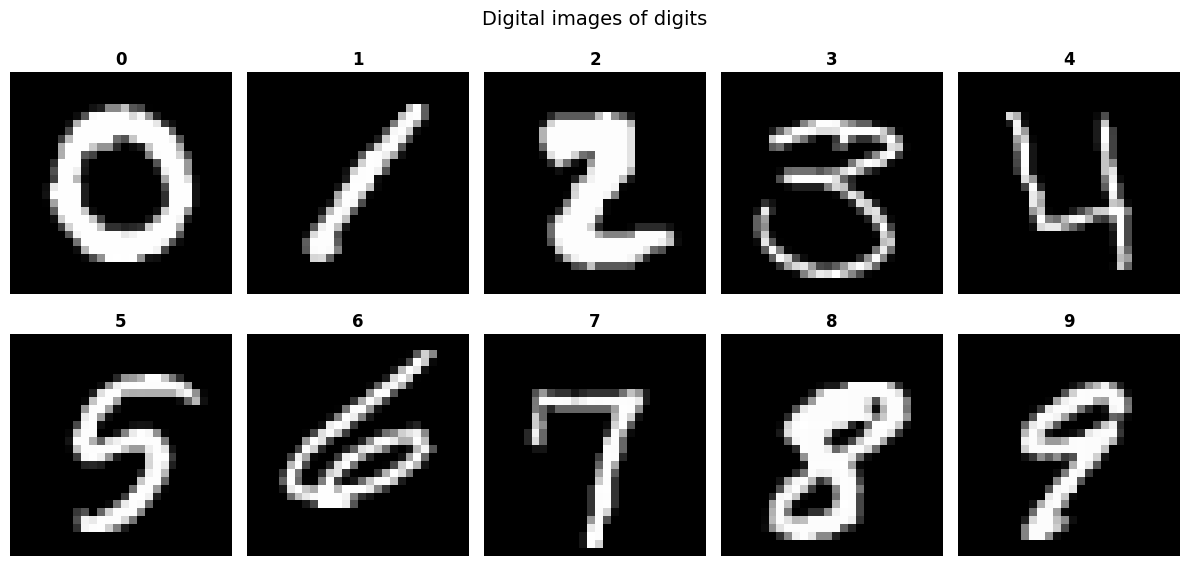

In [57]:
cols = df.label.unique().shape[0] // 2
rows = df.label.unique().shape[0] // 5

fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(12, 6))
fig.suptitle("Digital images of digits", fontsize=14)
axs = axs.flatten()

for i in range(rows * cols):
  axs[i].imshow(df[df.label == i].iloc[0, 1:].values.reshape((28, 28)))
  axs[i].set_title(i, fontweight='bold')
  axs[i].axis('off')

plt.tight_layout()
plt.show()

### Splitting the dataset

In [146]:
X = df.iloc[:, 1:]
y = df.label

X.shape, y.shape

((42000, 784), (42000,))

In [147]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=34)

X_train.shape, X_test.shape

((33600, 784), (8400, 784))

### Dimensionality reduction
> Using **PCA** to reduce the number of columns in the `X` split.

#### Standardization

In [151]:
scaler = SS()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_test[:, 100]

array([-0.26183166, -0.26183166, -0.26183166, ..., -0.26183166,
       -0.26183166, -0.26183166])

#### PCA

In [152]:
pca = PCA(n_components=200)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape[1], X_test.shape[1]

(200, 200)

### Model training

| Status | Training time (seconds) |
| ------ | ------------- |
| Without PCA | 20 - 23 |
| With PCA | 5 - 7 |

In [153]:
neighbors = 5
weights = 'uniform'
metric = 'minkowski'

knn = KNC(n_neighbors=neighbors, weights=weights, metric=metric)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [154]:
%%time
t1 = time.time()

y_pred = knn.predict(X_test)

t2 = time.time()
print(f"Training time : {(t2 - t1):.2f} seconds\n")

Training time : 7.23 seconds

CPU times: user 7.09 s, sys: 6.45 ms, total: 7.09 s
Wall time: 7.23 s


### Model evaluation

| Status | Accuracy (%) |
| ------ | ------------- |
| Without PCA | 96 - 97 |
| With PCA | 94 - 95 |

In [155]:
print(f"Model accuracy : {(accuracy(y_test, y_pred) * 100):.2f}%")

Model accuracy : 94.83%


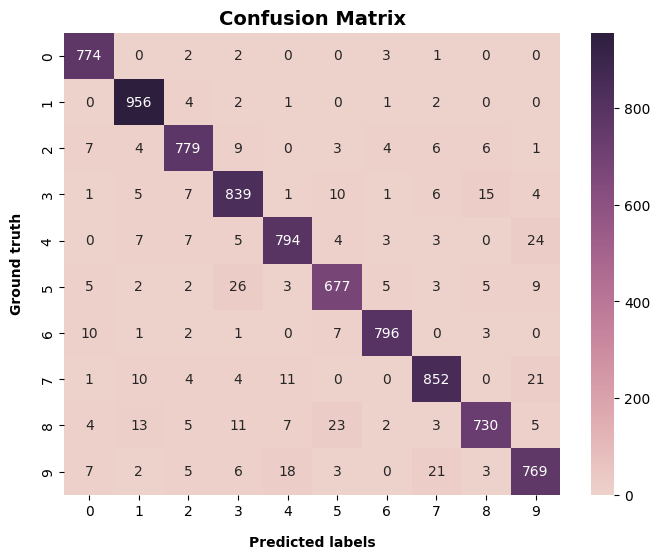

In [157]:
plt.figure(figsize=(8, 6))

cm = c_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap=sns.cubehelix_palette(as_cmap=True))

plt.title("Confusion Matrix", fontweight='bold', fontsize=14)
plt.xlabel("Predicted labels", fontweight='bold', labelpad=12)
plt.ylabel("Ground truth", fontweight='bold', labelpad=12)

plt.show()